# <center><b>川渝地区新中式茶饮消费现状与意愿调查</b></center>

## 提前导入库

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings

from sklearn.cluster import KMeans


# 忽略无关警告
warnings.filterwarnings('ignore')

# 图像可以显示中文
matplotlib.rcParams['font.sans-serif'] = ['STSong']
matplotlib.rcParams['axes.unicode_minus'] = False

# 设置，使得数据对齐
pd.set_option('display.max_rows', None)
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

# 设置随机种子
np.random.seed(114514)

## 1. 数据读取与探索性分析

In [3]:
raw_data = pd.read_excel('resources\pre_inquiry.xlsx') # 原始数据

data_filter = raw_data.iloc[:,1:-1] # 排除掉 序号 | 词云数据

data_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   产品质量—口味                              105 non-null    int64
 1   口感                                   105 non-null    int64
 2   原料健康程度                               105 non-null    int64
 3   特色度                                  105 non-null    int64
 4   附属产品—包装精美                            105 non-null    int64
 5   容器质量                                 105 non-null    int64
 6   赠品迷人                                 105 non-null    int64
 7   价格因素—价格合理                            105 non-null    int64
 8   促销力度                                 105 non-null    int64
 9   性价比高                                 105 non-null    int64
 10  服务—店员服务态度                            105 non-null    int64
 11  平台服务                                 105 non-null    int64

这个数据集是完整的，没有缺失值，包含了105条记录和49个整数类型的特征，现在可以进行后续的数据分析或机器学习处理。

## 2. K-means 聚类分析

In [9]:
WCSS = [] # 簇内平方和

for i in range(2, 11): # 从1到10中选择
    km = KMeans(n_clusters=i, n_init='auto', random_state=0, algorithm='elkan').fit(data_filter)
    WCSS.append(km.inertia_) # inertia_: 簇内平方和

WCSS

[3372.2111111111108,
 2212.932566168009,
 2134.133667872564,
 2066.1446073639627,
 2029.9791393791393,
 1927.67306998557,
 1846.1482986463025,
 1772.1119350099384,
 1742.745268343272]

Text(0, 0.5, 'Inertia')

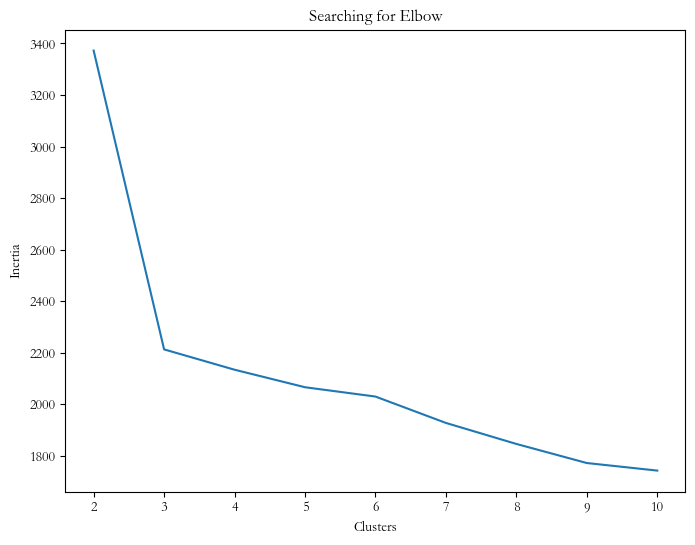

In [12]:
x_idx = np.arange(2, 11)
Y = np.array(WCSS)
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=x_idx, y=Y, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
